# עבודת גמר הדמיית נתונים

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import glob
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.ensemble import VotingClassifier

## חלק ראשון:


In [4]:
# https://www.kaggle.com/uciml/forest-cover-type-dataset
# https://towardsdatascience.com/ensemble-learning-using-scikit-learn-85c4531ff86a

In [5]:
# df = pd.read_csv(r'C:\Users\user\Desktop\Exel files\covtype.csv')

In [6]:
# df.describe()

## חלק שני:


In [7]:
training_path = r'C:\Users\user\Desktop\Exel files\semester_2_final\Training'

In [8]:
Evyatar_Cohen_Spontan = '\Evyatar Cohen\Evyatar636771052727603804Spontan.csv'
Evyatar_Cohen_Sync = '\Evyatar Cohen\Evyatar636771053639929594Sync.csv'
Evyatar_Cohen_Alone = '\Evyatar Cohen\Evyatar636771054555711409Alone.csv'

In [9]:
Namecunter = 0

In [10]:
df1 = pd.read_csv(training_path+Evyatar_Cohen_Alone)
df2 = pd.read_csv(training_path+Evyatar_Cohen_Sync)
df3 = pd.read_csv(training_path+Evyatar_Cohen_Spontan)

df1['Name'] = df2['Name'] = df3['Name'] = Namecunter
Namecunter = Namecunter+1
df1['Experiment Mode'] = 0 #'Alone'
df2['Experiment Mode'] = 1 #'Sync'
df3['Experiment Mode'] = 2 #'Spontan'

In [11]:
Nofar_Social_Nuero_Alone = r'\Nofar Social_Nuero\Nofar636759796290435160Alone.csv'
df4 = pd.read_csv(training_path+Nofar_Social_Nuero_Alone)
df4['Name'] = 2
df4['Experiment Mode'] = 0 #'Alone'

In [12]:
HandRight_path = r'C:\Users\user\Desktop\Exel files\semester_2_final\HandRight.csv'
HandRight = pd.read_csv(HandRight_path)
HandRight0 = HandRight.copy()
len(HandRight0)

4812

In [13]:
columns = ['Time', ' Frame ID', ' # hands', 'Name', 'Experiment Mode',
            'Left Position X','Left Position Y', 'Left Position Z', 'Left Velocity X', 'Left Velocity Y',
            'Left Velocity Z', 'Left Pitch', 'Left Roll', 'Left Yaw', 'Left Wrist Pos X',
            'Left Wrist Pos Y', 'Left Wrist Pos Z', 'Left Elbow pos X', 'Left Elbow Pos Y',
            'Left Elbow Pos Z', 'Left Grab Strenth', 'Left Grab Angle', 'Left Pinch Strength',
            'Right Position X','Right Position Y', 'Right Position Z', 'Right Velocity X', 'Right Velocity Y',
            'Right Velocity Z', 'Right Pitch', 'Right Roll', 'Right Yaw', 'Right Wrist Pos X',
            'Right Wrist Pos Y', 'Right Wrist Pos Z', 'Right Elbow pos X', 'Right Elbow Pos Y',
            'Right Elbow Pos Z', 'Right Grab Strenth', 'Right Grab Angle', 'Right Pinch Strength']
columns0 = ['Time', ' Frame ID',  ' # hands','Name', 'Experiment Mode']

columns1 = [' Position X',' Position Y', ' Position Z', ' Velocity X', ' Velocity Y',
           ' Velocity Z', ' Pitch', ' Roll', ' Yaw', ' Wrist Pos X',
           ' Wrist Pos Y', ' Wrist Pos Z', ' Elbow pos X', ' Elbow Pos Y',
           ' Elbow Pos Z', ' Grab Strenth', ' Grab Angle', ' Pinch Strength']
columns2 = [['Time', ' Frame ID', ' Hand Type', ' # hands','Name', 'Experiment Mode',
            ' Position X',' Position X', ' Position Y',' Position Y', ' Position Z',' Position Z',
             ' Velocity X',' Velocity X', ' Velocity Y',' Velocity Y',  ' Velocity Z', ' Velocity Z', 
             ' Pitch',' Pitch', ' Roll',' Roll', ' Yaw',' Yaw', ' Wrist Pos X',' Wrist Pos X',
             ' Wrist Pos Y',' Wrist Pos Y', ' Wrist Pos Z',' Wrist Pos Z', ' Elbow pos X',' Elbow pos X', 
             ' Elbow Pos Y',' Elbow Pos Y',' Elbow Pos Z',' Elbow Pos Z', ' Grab Strenth',' Grab Strenth', 
             ' Grab Angle', ' Grab Angle', ' Pinch Strength',' Pinch Strength'],
            [' ',' ',' ',' ',' ',' ',
             'Left','Right','Left','Right','Left','Right','Left','Right','Left','Right',
             'Left','Right','Left','Right','Left','Right','Left','Right','Left','Right',
             'Left','Right','Left','Right','Left','Right','Left','Right','Left','Right',
             'Left','Right','Left','Right','Left','Right']]

In [14]:
def nogg(df):
    df = df.reset_index()
    df = df.drop(['index'],axis=1)
    return df

In [15]:
df1.head()

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength,Name,Experiment Mode
0,518.8087,149620,left,1,-97.60160,164.1213,42.81255,104.2589,-491.6730,-55.42755,...,164.8320,27.58547,-378.1662,65.89330,-69.90282,0.0,0.741855,0.0,0,0
1,518.8252,149622,left,1,-95.78062,157.6353,42.18084,148.9683,-351.7386,-36.32422,...,155.6419,29.71037,-380.3233,52.92441,-55.71872,0.0,0.827916,0.0,0,0
2,518.8418,149623,left,1,-94.39360,154.6338,41.93171,161.6958,-349.9117,-29.04277,...,151.5701,31.05059,-381.7444,48.55032,-47.27909,0.0,0.920401,0.0,0,0
3,518.8587,149625,left,1,-92.02553,150.6723,42.10119,117.3475,-187.1781,24.42598,...,144.6214,33.94577,-383.4688,40.27151,-30.72728,0.0,1.034603,0.0,0,0
4,518.8749,149627,left,1,-89.31953,148.1826,42.67065,155.3344,-135.6337,35.87055,...,138.6087,36.68195,-381.0906,29.07133,-17.01065,0.0,1.166705,0.0,0,0


In [16]:
columnsdf1 = df1.columns
def get_Alone_df(new_df):
    tempdf0 = DataFrame(columns=columnsdf1)
    tempdf0 = tempdf0.append(new_df[new_df[' Hand Type']=='left'])
    tempdf0 = tempdf0.reset_index()
    del tempdf0['index']

    ezhafe = DataFrame(columns=columns2)
    tempdf = DataFrame(columns=columnsdf1)
    tempdf = tempdf.append(new_df)
    tempdf = tempdf.reset_index()
    del tempdf['index']
    for x in columns1:
        ezhafe[x] = tempdf[x]
    for x in columns1:
        ezhafe[x,'Right'] = HandRight0[x].copy()
    for x in columns0:
        ezhafe[x,' '] = tempdf0[x]

    final_df = DataFrame(ezhafe, columns=ezhafe.columns)
    final_df = DataFrame(final_df, columns=[['Time', ' Frame ID', ' # hands', 'Name', 'Experiment Mode',
            ' Position X',' Position X', ' Position Y',' Position Y', ' Position Z',' Position Z',
             ' Velocity X',' Velocity X', ' Velocity Y',' Velocity Y',  ' Velocity Z', ' Velocity Z', 
             ' Pitch',' Pitch', ' Roll',' Roll', ' Yaw',' Yaw', ' Wrist Pos X',' Wrist Pos X',
             ' Wrist Pos Y',' Wrist Pos Y', ' Wrist Pos Z',' Wrist Pos Z', ' Elbow pos X',' Elbow pos X', 
             ' Elbow Pos Y',' Elbow Pos Y',' Elbow Pos Z',' Elbow Pos Z', ' Grab Strenth',' Grab Strenth', 
             ' Grab Angle', ' Grab Angle', ' Pinch Strength',' Pinch Strength'],#42
            [' ',' ',' ',' ',' ',
             'Left','Right','Left','Right','Left','Right','Left','Right','Left','Right',
             'Left','Right','Left','Right','Left','Right','Left','Right','Left','Right',
             'Left','Right','Left','Right','Left','Right','Left','Right','Left','Right',
             'Left','Right','Left','Right','Left','Right']])

    final_df = final_df[final_df.index%20==0]
    final_df = final_df[final_df.index>=700]
    final_df = nogg(final_df)
    final_df = final_df
    return final_df

In [17]:
df1 = get_Alone_df(df1)

In [18]:
df1.head(3)

Time  Frame ID  # hands Name Experiment Mode  Position X             \
                                                           Left      Right   
0  530.4075    150957        1    0               0   -62.14016  27.550410   
1  530.7388    150995        1    0               0   -65.60078  59.588350   
2  531.0707    151034        1    0               0   -58.67621  -1.415332   

   Position Y            Position Z  ...   Elbow Pos Y            Elbow Pos Z  \
         Left     Right        Left  ...          Left     Right         Left   
0    176.4449  232.7543    27.85700  ...      95.06994  52.26681    -3.509623   
1    289.7090  187.0016    13.32176  ...     138.38280  45.36940   -59.364530   
2    210.1751  184.4684    19.96792  ...     148.79210  51.53496   -62.265350   

             Grab Strenth        Grab Angle            Pinch Strength        
      Right          Left Right        Left     Right            Left Right  
0  287.7588           0.0   0.0    0.000000  0.498644             0.0   0.0  
1  349.5035           0.0   0.0    0.724544  0.594971             0.0   0.0  
2  327.9102           0.0   0.0    0.498183  0.556560             0.0   0.0  

[3 rows x 41 columns]

In [19]:
HandRight0 = nogg(HandRight0.iloc[1:])
len(HandRight0)

4811

In [20]:
df4 = get_Alone_df(df4)

In [21]:
df4.head(3)

Time  Frame ID  # hands Name Experiment Mode  Position X             \
                                                           Left      Right   
0  507.6639     59523        1    2               0   -54.17390  33.196470   
1  507.9956     59561        1    2               0   -39.51262  55.423450   
2  508.3267     59599        1    2               0   -33.47280  -1.874014   

   Position Y            Position Z  ...   Elbow Pos Y            Elbow Pos Z  \
         Left     Right        Left  ...          Left     Right         Left   
0    404.6508  237.5320   102.53100  ...     264.48880  51.28829    22.379220   
1    259.0963  182.1599    66.94943  ...     123.27050  43.29059    -6.323922   
2    162.3875  187.7745    65.01147  ...      89.21803  48.40028    22.184030   

             Grab Strenth        Grab Angle            Pinch Strength        
      Right          Left Right        Left     Right            Left Right  
0  287.5629           0.0   0.0    0.993057  0.520795             0.0   0.0  
1  351.3723           0.0   0.0    0.104894  0.638669             0.0   0.0  
2  325.0872           0.0   0.0    0.000000  0.562597             0.0   0.0  

[3 rows x 41 columns]

In [22]:
df4.drop([' # hands'], 1).columns.values

array([('Time', ' '), (' Frame ID', ' '), ('Name', ' '),
       ('Experiment Mode', ' '), (' Position X', 'Left'),
       (' Position X', 'Right'), (' Position Y', 'Left'),
       (' Position Y', 'Right'), (' Position Z', 'Left'),
       (' Position Z', 'Right'), (' Velocity X', 'Left'),
       (' Velocity X', 'Right'), (' Velocity Y', 'Left'),
       (' Velocity Y', 'Right'), (' Velocity Z', 'Left'),
       (' Velocity Z', 'Right'), (' Pitch', 'Left'), (' Pitch', 'Right'),
       (' Roll', 'Left'), (' Roll', 'Right'), (' Yaw', 'Left'),
       (' Yaw', 'Right'), (' Wrist Pos X', 'Left'),
       (' Wrist Pos X', 'Right'), (' Wrist Pos Y', 'Left'),
       (' Wrist Pos Y', 'Right'), (' Wrist Pos Z', 'Left'),
       (' Wrist Pos Z', 'Right'), (' Elbow pos X', 'Left'),
       (' Elbow pos X', 'Right'), (' Elbow Pos Y', 'Left'),
       (' Elbow Pos Y', 'Right'), (' Elbow Pos Z', 'Left'),
       (' Elbow Pos Z', 'Right'), (' Grab Strenth', 'Left'),
       (' Grab Strenth', 'Right'), (' Grab A

In [23]:
def get_Spontan_or_Sync_df(new_df):
    hardhafe = DataFrame(columns=columns2)
    tempdf = DataFrame(columns=new_df.columns)
    tempdf = tempdf.append(new_df)
    tempdf = tempdf.reset_index()
    del tempdf['index']

    temp = tempdf[tempdf[' Hand Type']=='left']
    temp = temp.reset_index()
    del temp['index']
    for x in columns1:
        hardhafe[x]= temp[x]
        hardhafe[x,'Right']= np.nan
    for x in columns0:
        hardhafe[x,' ']= temp[x]
    temp = tempdf[tempdf[' Hand Type']=='right']
    temp = temp.reset_index()
    del temp['index']
    for x in columns1:
        hardhafe[x,'Right']= temp[x]
    for x in columns0:
        hardhafe[x,' ']= temp[x]
    hardhafe = hardhafe.drop(columns=[' Hand Type'])
    final_df = DataFrame(hardhafe,columns=hardhafe.columns)
    final_df = final_df.reset_index()
    del final_df['index']
    final_df = DataFrame(final_df,columns=[['Time', ' Frame ID', ' # hands', 'Name', 'Experiment Mode',
                ' Position X',' Position X', ' Position Y',' Position Y', ' Position Z',' Position Z',
                 ' Velocity X',' Velocity X', ' Velocity Y',' Velocity Y',  ' Velocity Z', ' Velocity Z', 
                 ' Pitch',' Pitch', ' Roll',' Roll', ' Yaw',' Yaw', ' Wrist Pos X',' Wrist Pos X',
                 ' Wrist Pos Y',' Wrist Pos Y', ' Wrist Pos Z',' Wrist Pos Z', ' Elbow pos X',' Elbow pos X', 
                 ' Elbow Pos Y',' Elbow Pos Y',' Elbow Pos Z',' Elbow Pos Z', ' Grab Strenth',' Grab Strenth', 
                 ' Grab Angle', ' Grab Angle', ' Pinch Strength',' Pinch Strength'],#42
                [' ',' ',' ',' ',' ',
                 'Left','Right','Left','Right','Left','Right','Left','Right','Left','Right',
                 'Left','Right','Left','Right','Left','Right','Left','Right','Left','Right',
                 'Left','Right','Left','Right','Left','Right','Left','Right','Left','Right',
                 'Left','Right','Left','Right','Left','Right']])

    final_df = final_df[final_df.index%20==0]
    final_df = final_df[final_df.index>=700]
    final_df = nogg(final_df)
    return final_df

In [24]:
df2 = get_Spontan_or_Sync_df(df2)
df3 = get_Spontan_or_Sync_df(df3)

In [25]:
len(df2)

192

In [26]:
tempi = pd.DataFrame( )

In [27]:
def get_part_of_finaldf(df):
    tempi = pd.DataFrame( )
    for x in ['Name', 'Experiment Mode']:
        tempi[x] = df[x][' ']
    for i in range(0,5):
        temp = df[(df.index%5)==i]
        temp = temp.reset_index()
        temp = temp.drop(['index'],axis=1)
        for x in columns1:
            for y in ['Left','Right']:
                    tempi[x+' '+y+" "+str(i)] = temp[x,y]
        for x in ['Time', ' Frame ID']:
            tempi[x+' '+str(i)] = temp[x]
    return nogg(tempi.dropna())

In [28]:
df1 = get_part_of_finaldf(df1)
df2 = get_part_of_finaldf(df2)
df3 = get_part_of_finaldf(df3)

In [29]:
len(df2)

38

In [30]:
df1.head()

,Name,Experiment Mode,Position X Left 0,Position X Right 0,Position Y Left 0,Position Y Right 0,Position Z Left 0,Position Z Right 0,Velocity X Left 0,Velocity X Right 0,...,Elbow Pos Z Left 4,Elbow Pos Z Right 4,Grab Strenth Left 4,Grab Strenth Right 4,Grab Angle Left 4,Grab Angle Right 4,Pinch Strength Left 4,Pinch Strength Right 4,Time 4,Frame ID 4
0,0,0,-62.140160,27.55041,176.4449,232.7543,27.857000,32.63120,162.50850,322.75860,...,-5.903192,318.5547,0.000000,1.0,0.000000,2.937895,0.000000,0.230982,531.7335,151110
1,0,0,-72.244350,28.44401,305.3736,231.9760,28.321170,56.63601,-83.49541,-35.38434,...,18.267990,292.5506,0.611778,1.0,2.828559,3.141593,0.307267,1.000000,533.3906,151301
2,0,0,-6.808535,52.29155,145.5272,221.8005,31.058690,63.57324,73.03231,81.41098,...,48.125120,313.2162,0.000000,0.0,0.279276,0.092528,0.000000,0.000000,535.0468,151492
3,0,0,-29.044510,59.93619,157.8837,172.8701,7.321979,51.10153,-252.55510,128.49120,...,15.608080,305.0028,0.001378,0.0,1.120591,0.204764,0.000000,0.000000,536.7035,151683
4,0,0,22.013420,70.19556,144.0578,234.8414,47.600750,43.84310,51.78490,433.80610,...,11.874660,319.4179,0.000000,0.0,0.363865,0.483526,0.198525,0.000000,538.3603,151874


In [31]:
final_temp_df = df1
final_temp_df = final_temp_df.append(df2)
final_temp_df = final_temp_df.append(df3)
final_temp_df = final_temp_df.reset_index().drop(['index'],axis=1)
#final_temp_df = final_temp_df.dropna()
final_temp_df.sample(5, random_state=8)

,Name,Experiment Mode,Position X Left 0,Position X Right 0,Position Y Left 0,Position Y Right 0,Position Z Left 0,Position Z Right 0,Velocity X Left 0,Velocity X Right 0,...,Elbow Pos Z Left 4,Elbow Pos Z Right 4,Grab Strenth Left 4,Grab Strenth Right 4,Grab Angle Left 4,Grab Angle Right 4,Pinch Strength Left 4,Pinch Strength Right 4,Time 4,Frame ID 4
35,0,0,-65.40440,-128.29890,183.1866,200.4363,65.548730,121.15890,90.81615,-353.504900,...,16.85452,300.4148,0.019014,0.000000,1.516172,0.606556,0.72151,0.000000,589.7241,157793
101,0,2,-110.65740,169.29200,143.2380,213.5885,5.292718,-34.01842,10.25857,-36.453210,...,92.05402,173.2167,0.000000,0.000000,0.263357,0.551105,0.00000,0.000000,391.9937,135009
58,0,1,-115.35340,167.48770,151.4245,168.3155,69.973100,63.44626,-126.96950,338.890200,...,-20.00664,143.7630,0.000000,0.056809,1.105694,1.267088,0.04347,0.176387,474.9474,144566
55,0,1,-104.94590,139.55080,247.1310,230.1242,80.219410,66.40870,-121.48420,30.650930,...,95.37519,196.2454,0.000000,0.000000,0.672059,0.151511,0.00000,0.000000,469.9775,143993
29,0,0,-69.01958,16.64507,110.0350,220.0074,-17.255210,-13.79020,-144.89500,5.390491,...,24.19761,269.6568,0.000000,0.000000,0.000000,0.315531,0.00000,0.000000,579.7810,156648


In [32]:
final_temp_df.columns.values

array(['Name', 'Experiment Mode', ' Position X Left 0',
       ' Position X Right 0', ' Position Y Left 0', ' Position Y Right 0',
       ' Position Z Left 0', ' Position Z Right 0', ' Velocity X Left 0',
       ' Velocity X Right 0', ' Velocity Y Left 0', ' Velocity Y Right 0',
       ' Velocity Z Left 0', ' Velocity Z Right 0', ' Pitch Left 0',
       ' Pitch Right 0', ' Roll Left 0', ' Roll Right 0', ' Yaw Left 0',
       ' Yaw Right 0', ' Wrist Pos X Left 0', ' Wrist Pos X Right 0',
       ' Wrist Pos Y Left 0', ' Wrist Pos Y Right 0',
       ' Wrist Pos Z Left 0', ' Wrist Pos Z Right 0',
       ' Elbow pos X Left 0', ' Elbow pos X Right 0',
       ' Elbow Pos Y Left 0', ' Elbow Pos Y Right 0',
       ' Elbow Pos Z Left 0', ' Elbow Pos Z Right 0',
       ' Grab Strenth Left 0', ' Grab Strenth Right 0',
       ' Grab Angle Left 0', ' Grab Angle Right 0',
       ' Pinch Strength Left 0', ' Pinch Strength Right 0', 'Time 0',
       ' Frame ID 0', ' Position X Left 1', ' Position X Rig

In [33]:
TrainingPeopleFolders = [r'\Evyatar Cohen', 
                         r'\Nofar Social_Nuero', 
                         r'\Oriya Social_Nuero', 
                         r'\Orya Kalmanovitz', 
                         r'\Revital Marbel', 
                         r'\Shahar Terner',
                         r'\Shelly Social_Nuero', 
                         r'\Yael Hagai', 
                         r'\Yoel Raz' ]
TrainingPath = r'C:\Users\user\Desktop\Exel files\semester_2_final\Training'

In [34]:
# temp = pd.DataFrame(columns=df4.drop([' # hands'], 1).columns)
# temp

In [35]:
# temp = pd.DataFrame(columns=final_temp_df.columns.values)
# HandRight0 = HandRight.copy()
# NameCunter = 0
# for x in TrainingPeopleFolders:
#     PersonTrainingFiles = glob.glob(TrainingPath +x+ "/*.csv")
#     NameCunter = NameCunter+1
#     for filename in PersonTrainingFiles:
#         df = pd.read_csv(filename)
#         if 'Alone' in filename:
#             df['Name'] = NameCunter
#             df['Experiment Mode'] = 0 #'Alone'
#             df = get_Alone_df(df)
#             HandRight0 = nogg(HandRight0.iloc[1:])
            
#         elif 'Sync' in filename:
#             df['Name'] = NameCunter
#             df['Experiment Mode'] = 1 #'Sync'
#             df = get_Spontan_or_Sync_df(df)
            
#         else:
#             df['Name'] = NameCunter
#             df['Experiment Mode'] = 2 #'Spontan'
#             df = get_Spontan_or_Sync_df(df)
            
#         df = get_part_of_finaldf(df)
#         temp = temp.append(df.dropna())
#         temp = nogg(temp)
# temp.head()

In [36]:
# ax0 = sns.pairplot(data=temp, 
#                     hue='Experiment Mode',
#                     x_vars=[' Position X Right 0'], 
#                     y_vars=[' Position X Left 0' ], 
#                     size=5, aspect=2);
# plt.show()
# ax1 = sns.pairplot(data=temp, 
#                     hue='Experiment Mode',
#                     x_vars=[' Position X Right 1'], 
#                     y_vars=[' Position X Left 1' ], 
#                     size=5, aspect=2);
# plt.show()
# ax2 = sns.pairplot(data=temp, 
#                     hue='Experiment Mode',
#                     x_vars=[' Position X Right 2'], 
#                     y_vars=[' Position X Left 2' ], 
#                     size=5, aspect=2);
# plt.show()
# ax3 = sns.pairplot(data=temp, 
#                     hue='Experiment Mode',
#                     x_vars=[' Position X Right 3'], 
#                     y_vars=[' Position X Left 3' ], 
#                     size=5, aspect=2);
# plt.show()
# ax4 = sns.pairplot(data=temp, 
#                     hue='Experiment Mode',
#                     x_vars=[' Position X Right 4'], 
#                     y_vars=[' Position X Left 4' ], 
#                     size=5, aspect=2);
# plt.show()

In [37]:
df0 = pd.DataFrame(columns=final_temp_df.columns.values)
HandRight0 = HandRight.copy()
NameCunter = 0
for x in TrainingPeopleFolders:
    PersonTrainingFiles = glob.glob(TrainingPath +x+ "/*.csv")
    NameCunter = NameCunter+1
    for filename in PersonTrainingFiles:
        df = pd.read_csv(filename)
        if 'Alone' in filename:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 0 #'Alone'
            df = get_Alone_df(df)
            HandRight0 = nogg(HandRight0.iloc[1:])
            
        elif 'Sync' in filename:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 1 #'Sync'
            df = get_Spontan_or_Sync_df(df)
            
        else:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 2 #'Spontan'
            df = get_Spontan_or_Sync_df(df)
            
        df = get_part_of_finaldf(df)
        df0 = df0.append(df.dropna())
        df0 = nogg(df0)

In [38]:
df0.sample(10)

,Name,Experiment Mode,Position X Left 0,Position X Right 0,Position Y Left 0,Position Y Right 0,Position Z Left 0,Position Z Right 0,Velocity X Left 0,Velocity X Right 0,...,Elbow Pos Z Left 4,Elbow Pos Z Right 4,Grab Strenth Left 4,Grab Strenth Right 4,Grab Angle Left 4,Grab Angle Right 4,Pinch Strength Left 4,Pinch Strength Right 4,Time 4,Frame ID 4
1000,5,0,-70.23895,-85.09817,216.7535,404.2018,13.38768,32.87494,226.52060,-26.43498,...,195.689700,406.0116,0.0,0.000000,0.353664,0.700867,0.000000,0.000000,530.3507,61816
100,1,0,-78.73698,43.66343,144.4623,121.7762,-54.67911,11.54568,-48.88937,62.93681,...,-4.310256,269.7351,0.0,0.334852,0.250117,1.737713,0.000000,1.000000,298.3399,124221
954,5,1,-74.99658,111.82700,178.9191,224.6362,113.91410,-38.23516,-105.35410,-19.04967,...,82.537080,133.5629,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,407.4637,47671
1115,6,1,-100.15580,113.29860,144.6076,193.7864,27.40434,-10.88952,34.27942,18.11895,...,27.745650,72.5366,0.0,0.000000,0.000000,0.180397,0.000000,0.000000,499.4953,60136
647,3,0,-139.07590,32.87799,156.0084,263.2680,-33.60867,62.35759,207.20520,-112.39800,...,44.977640,341.1446,0.0,0.000000,0.527115,0.238264,0.000000,0.000000,649.9016,74980
237,2,2,-123.93050,149.38710,116.7208,266.9207,56.66840,29.63311,-125.83580,12.90625,...,-21.795930,134.9948,0.0,0.000000,0.993044,0.070585,0.000000,0.000000,116.4750,14431
645,3,0,-151.53090,52.55248,189.6795,172.3204,-45.21171,128.82080,-229.26360,-13.65902,...,13.490270,330.6737,0.0,0.000000,0.000000,0.266062,0.000000,0.000000,646.5889,74598
351,2,2,-153.96840,79.77284,302.4086,209.3073,66.43113,152.44990,-77.10030,-59.05483,...,-28.718840,201.7392,0.0,0.000000,0.347668,0.299101,0.000000,0.000000,419.0320,49306
1370,7,1,-74.91029,116.47060,216.3457,204.8593,114.89950,76.86162,123.73090,-26.96343,...,157.149400,161.1916,0.0,0.000000,2.557289,0.646726,0.662063,0.000000,722.2825,83644
1584,9,1,-105.69500,101.26220,202.5321,182.9927,11.31777,8.43527,37.76712,95.10690,...,125.190400,150.1707,0.0,0.000000,1.158831,1.240316,1.000000,0.837639,824.0391,64539


In [39]:
len(df0[df0['Experiment Mode'] == 2  ][df0['Name'] == 3]) 

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


76

In [40]:
temp = df0[df0['Experiment Mode'] < 2 ].copy()#

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


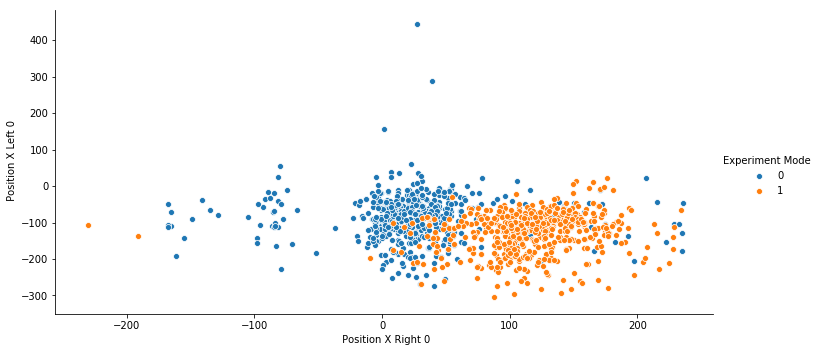

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


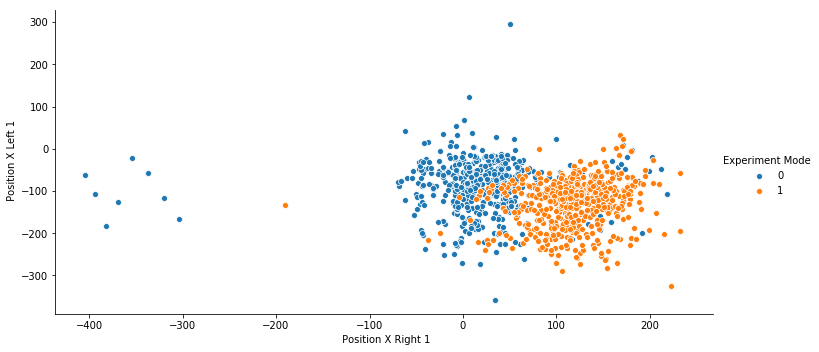

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


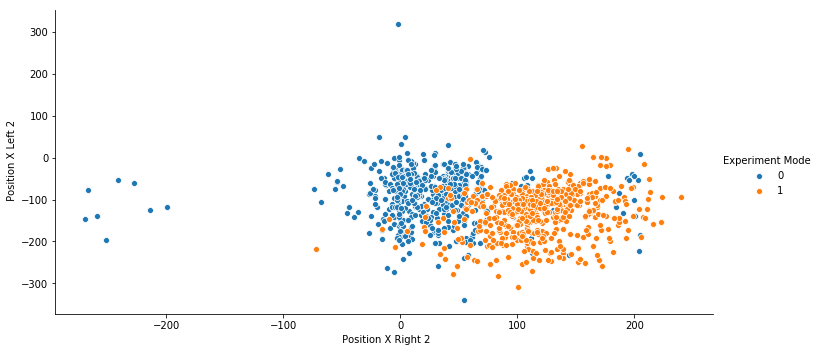

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


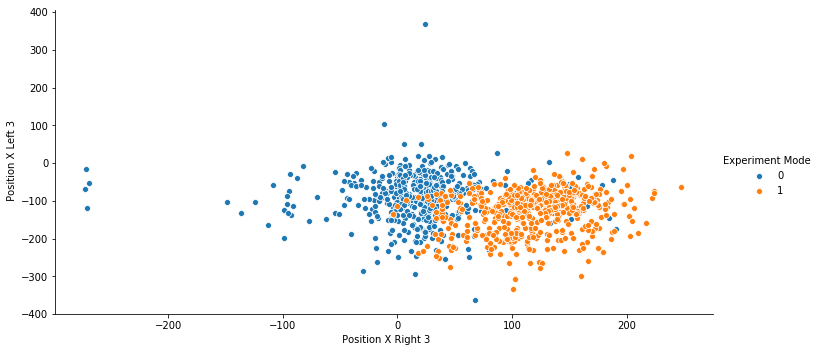

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


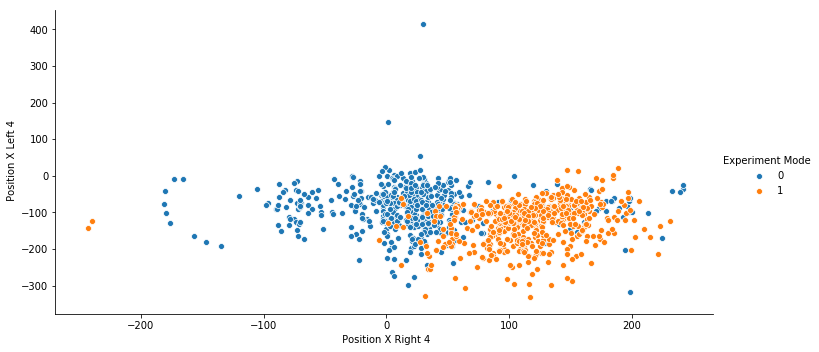

In [41]:
ax0 = sns.pairplot(data=temp, 
                    hue='Experiment Mode',
                    x_vars=[' Position X Right 0'], 
                    y_vars=[' Position X Left 0' ], 
                    size=5, aspect=2);
plt.show()
ax1 = sns.pairplot(data=temp, 
                    hue='Experiment Mode',
                    x_vars=[' Position X Right 1'], 
                    y_vars=[' Position X Left 1' ], 
                    size=5, aspect=2);
plt.show()
ax2 = sns.pairplot(data=temp, 
                    hue='Experiment Mode',
                    x_vars=[' Position X Right 2'], 
                    y_vars=[' Position X Left 2' ], 
                    size=5, aspect=2);
plt.show()
ax3 = sns.pairplot(data=temp, 
                    hue='Experiment Mode',
                    x_vars=[' Position X Right 3'], 
                    y_vars=[' Position X Left 3' ], 
                    size=5, aspect=2);
plt.show()
ax4 = sns.pairplot(data=temp, 
                    hue='Experiment Mode',
                    x_vars=[' Position X Right 4'], 
                    y_vars=[' Position X Left 4' ], 
                    size=5, aspect=2);
plt.show()

In [42]:
TestDf = pd.DataFrame(columns=final_temp_df.columns.values)

In [43]:
TestingPeopleFolders = ['\Itiel Lab', '\Mor SHerman', '\Oded Medina']

In [44]:
TestingPath = r'C:\Users\user\Desktop\Exel files\semester_2_final\Validation'

In [45]:
for x in TestingPeopleFolders:
    PersonTrainingFiles = glob.glob(TestingPath +x+ "/*.csv")
    NameCunter = NameCunter+1
    for filename in PersonTrainingFiles:
        df = pd.read_csv(filename)
        if 'Alone' in filename:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 0 #'Alone'
            df = get_Alone_df(df)
            HandRight0 = nogg(HandRight0.iloc[1:])
            
        elif 'Sync' in filename:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 1 #'Sync'
            df = get_Spontan_or_Sync_df(df)
            
        else:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 2 #'Spontan'
            df = get_Spontan_or_Sync_df(df)
            
        df = get_part_of_finaldf(df)
        TestDf = TestDf.append(df.dropna())
        TestDf = nogg(TestDf)

In [46]:
TestDf

,Name,Experiment Mode,Position X Left 0,Position X Right 0,Position Y Left 0,Position Y Right 0,Position Z Left 0,Position Z Right 0,Velocity X Left 0,Velocity X Right 0,...,Elbow Pos Z Left 4,Elbow Pos Z Right 4,Grab Strenth Left 4,Grab Strenth Right 4,Grab Angle Left 4,Grab Angle Right 4,Pinch Strength Left 4,Pinch Strength Right 4,Time 4,Frame ID 4
0,10,2,-153.13400,127.10290,192.9331,113.2914,42.375790,-24.740110,1.381898,46.235730,...,164.89900,255.79750,0.000000,0.000000,1.189606,0.289280,0.953943,0.000000,785.2020,91809
1,10,2,-150.77640,103.38350,212.8092,158.4330,82.541620,3.589153,1.788826,33.734420,...,139.63540,209.57390,0.375480,0.505153,1.828708,1.497572,1.000000,0.000000,786.8586,91999
2,10,2,-155.80010,85.03840,217.7303,172.7979,58.783540,167.849700,-15.920980,-54.917500,...,153.21420,128.50140,0.000000,0.000000,0.258431,0.399461,0.000000,0.000000,788.5157,92190
3,10,2,-187.65010,94.30372,229.0524,177.8015,-0.015033,50.681560,-297.604100,-28.447570,...,153.41000,206.24530,0.000000,0.000000,0.486673,0.059221,0.000000,0.000000,790.1719,92381
4,10,2,-209.80040,89.24201,206.0219,124.7721,32.160640,75.221330,17.331460,44.194840,...,165.73910,190.22600,0.339692,0.000000,1.769297,0.184421,0.000000,0.000000,791.8286,92572
5,10,2,-204.70520,116.92130,289.3085,211.9156,39.209130,38.619630,319.342300,-188.056200,...,110.77770,144.36920,0.000000,0.000000,0.448653,0.058108,0.000000,0.000000,793.4854,92763
6,10,2,-133.85820,110.63360,180.6852,221.5060,41.322550,88.526020,112.455100,25.220910,...,110.32220,138.08050,0.019487,0.000000,1.058709,0.125965,0.000000,0.000000,795.1426,92954
7,10,2,-124.00340,143.03290,172.4615,187.1951,94.084850,50.911970,-22.209620,19.500500,...,83.72482,184.35070,0.000000,0.000000,0.473658,0.761520,0.000000,0.068095,796.7986,93145
8,10,2,-117.87610,160.35880,231.2032,250.4492,94.980670,94.725660,-13.835880,-51.222050,...,103.64030,249.49190,0.000000,0.000000,0.617547,0.682376,0.000000,0.000000,798.4553,93336
9,10,2,-136.18180,115.14830,117.0546,266.5714,56.942490,51.835010,-142.723500,-52.019420,...,129.96790,245.12270,0.000000,0.000000,0.532096,0.113983,0.000000,0.000000,800.1119,93527


In [47]:
X_train = df0.drop(['Experiment Mode'],axis=1)
y_train = df0['Experiment Mode']
y_train = y_train.astype('int')
X_test = TestDf.drop(['Experiment Mode'],axis=1)
y_test = TestDf['Experiment Mode']
y_test = y_test.astype('int')

In [48]:
LR = LogisticRegression() 
LR.fit(X_train,y_train)
Accuracy = LR.score(X_test,y_test)
print('LR Accuracy:',int(str(Accuracy*10000)[:4])/100,'%')

LR Accuracy: 85.39 %


In [49]:
nb = GaussianNB()
nb = nb.fit(X_train, y_train)
Accuracy = nb.score(X_test,y_test)
print('GaussianNB Accuracy:',int(str(Accuracy*10000)[:4])/100,'%')

GaussianNB Accuracy: 81.27 %


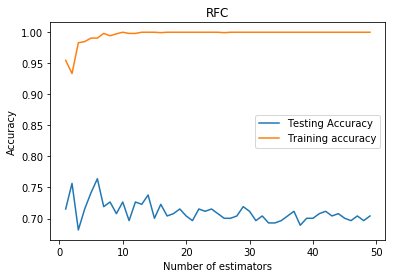

RFC Accuracy: 76.4 %


In [50]:
estimators = np.arange(1,50)
train_accuracy = np.empty(len(estimators))
test_accuracy =  np.empty(len(estimators))
for i,k in enumerate(estimators):
    RFC = RandomForestClassifier(n_estimators=k)
    RFC.fit(X_train, y_train)
    train_accuracy[i] = RFC.score(X_train, y_train)
    test_accuracy[i] = RFC.score(X_test, y_test)
    
plt.title('RFC')
plt.plot(estimators, test_accuracy, label='Testing Accuracy')
plt.plot(estimators, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()
print('RFC Accuracy:',int(str(test_accuracy.max()*10000)[:4])/100,'%')

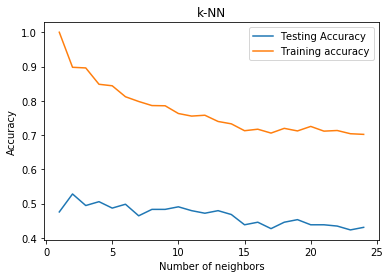

knn Accuracy: 52.8 %


In [51]:
neighbors = np.arange(1,25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.title('k-NN')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
print('knn Accuracy:',int(str(test_accuracy.max()*10000)[:4])/100,'%')

In [52]:
SVM = svm.SVC()
SVM.fit(X_train, y_train) 
Accuracy = SVM.score(X_test,y_test)
print('SVM Accuracy:',int(str(Accuracy*10000)[:4])/100,'%')

SVM Accuracy: 33.33 %


In [53]:
df_train = df0.drop(['Experiment Mode'],axis=1).copy()
df_test = TestDf.drop(['Experiment Mode'],axis=1).copy()

scaler = StandardScaler()
scaler.fit(df_train)
df_train = scaler.transform(df_train)
df_test = scaler.transform(df_test)

pca = PCA()
pca.fit(df_train)
df_train = pca.transform(df_train)
df_test = pca.transform(df_test)

In [54]:
SVM = svm.SVC()
SVM = SVM.fit(df_train, y_train) 
Accuracy = SVM.score(df_test,y_test)
print('SVM Accuracy:',Accuracy*100,'%')
# print(SVM.predict(df_test),y_test)

SVM Accuracy: 94.3820224719101 %


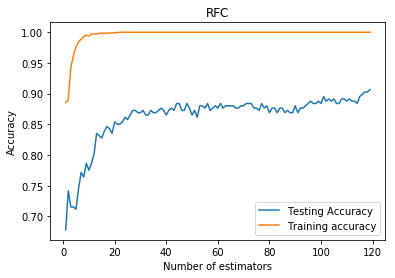

RFC Accuracy: 90.63 %


118

In [55]:
estimators = np.arange(1,120)
train_accuracy = np.empty(len(estimators))
test_accuracy = np.empty(len(estimators))
max_accuracy = 0
final_RFC = 0 
for i,k in enumerate(estimators):
    RFC = RandomForestClassifier(n_estimators=k, random_state=1)
    RFC.fit(df_train, y_train)
    train_accuracy[i] = RFC.score(df_train, y_train)
    test_accuracy[i] = RFC.score(df_test, y_test)
    
plt.title('RFC')
plt.plot(estimators, test_accuracy, label='Testing Accuracy')
plt.plot(estimators, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()
print('RFC Accuracy:',int(str(test_accuracy.max()*10000)[:4])/100,'%') 
test_accuracy.argmax()

In [56]:
RFC = RandomForestClassifier(n_estimators=119, random_state=3)
RFC.fit(df_train, y_train)
accuracy = RFC.score(df_test,y_test)
print('RFC Accuracy:',int(str(accuracy*10000)[:4])/100,'%')

RFC Accuracy: 86.14 %


In [57]:
LR = LogisticRegression() 
LR.fit(df_train,y_train)
accuracy = LR.score(df_test,y_test)
print('LR Accuracy:',int(str(accuracy*10000)[:4])/100,'%')

LR Accuracy: 91.01 %


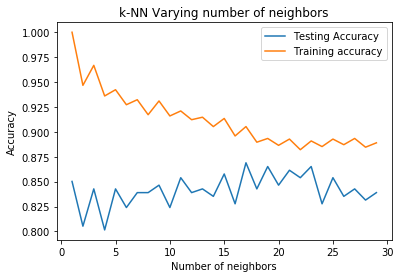

knn Accuracy: 86.89 %


In [58]:
neighbors = np.arange(1,30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df_train, y_train)
    train_accuracy[i] = knn.score(df_train, y_train)
    test_accuracy[i] = knn.score(df_test, y_test)
    
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
print('knn Accuracy:',int(str(test_accuracy.max()*10000)[:4])/100,'%') 

In [59]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(df_train, y_train)
accuracy = knn.score(df_test,y_test)
print('knn Accuracy:',int(str(accuracy*10000)[:4])/100,'%')

knn Accuracy: 86.89 %


In [60]:
nb = GaussianNB()
nb = nb.fit(df_train, y_train)
Accuracy = nb.score(df_test,y_test)
print( 'GaussianNB Accuracy:',int(str(Accuracy*10000)[:4])/100,'%')

GaussianNB Accuracy: 76.4 %


In [61]:
SVM = svm.SVC()
LR = LogisticRegression()
RFC = RandomForestClassifier(n_estimators=108, random_state=3)
Voting = VotingClassifier(estimators=[('SVM', SVM), ('RFC', RFC), ('LR', LR)], voting='hard') #('KNN', KNN), 
Voting = Voting.fit(df_train, y_train)
Accuracy = Voting.score(df_test, y_test)
print('Voting Accuracy:', Accuracy)

Voting Accuracy: 0.9438202247191011


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [62]:
def what_status(array):
    cunt_0 = 0
    cunt_1 = 0
    cunt_2 = 0
    for i in range(0,len(array)):
        if(array[i] == 0):
            cunt_0 = cunt_0+1
        if(array[i] == 1):
            cunt_1 = cunt_1+1
        if(array[i] == 2):
            cunt_2 = cunt_2+1
#     print(cunt_0, cunt_1, cunt_2)
    if((cunt_0 > cunt_1) & (cunt_0 > cunt_2)):
        return "Alone"
    if((cunt_1 > cunt_0) & (cunt_1 > cunt_2)):
        return "Sync"
    if((cunt_2 > cunt_0) & (cunt_2 > cunt_1)):
        return "Spontan"
    else:
        return "can't dicide"

In [64]:
for i in TestingPeopleFolders:
    PersonTrainingFiles = glob.glob(TestingPath +i+ "/*.csv")
    NameCunter = NameCunter+1
    for filename in PersonTrainingFiles:
        df = pd.read_csv(filename)
#         print (df.shape)
        if 'Alone' in filename:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 0 #'Alone'
            df = get_Alone_df(df)
            
        elif 'Sync' in filename:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 1 #'Sync'
            df = get_Spontan_or_Sync_df(df)
            
        else:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 2 #'Spontan'
            df = get_Spontan_or_Sync_df(df)
            
        df = get_part_of_finaldf(df)
        ddf = pd.DataFrame(columns=final_temp_df.columns.values)
        ddf = ddf.append(df.dropna())
        y = ddf['Experiment Mode']
        y = y.astype('int')
        x = ddf.drop(['Experiment Mode'], axis=1)
        x = scaler.transform(x)
        x = pca.transform(x)
        SVM = svm.SVC()
        SVM = SVM.fit(df_train, y_train)
        Accuracy = SVM.score(x,y)
        print(SVM.predict(x))
        if 'Alone' in filename:
            print('Alone')
        elif 'Sync' in filename:
            print('Sync')
        else:
            print('Spontan')
        print('SVM Accuracy:', Accuracy*100)
        if what_status(SVM.predict(x)) in filename: 
            print ("The model is right")
        else:             
            print ("The model is wrong")
        print(" ")

[2 2 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2]
Spontan
SVM Accuracy: 89.1891891891892
The model is right
 
[1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Sync
SVM Accuracy: 94.5945945945946
The model is right
 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Alone
SVM Accuracy: 100.0
The model is right
 
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Spontan
SVM Accuracy: 100.0
The model is right
 
[1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Sync
SVM Accuracy: 91.8918918918919
The model is right
 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Alone
SVM Accuracy: 100.0
The model is right
 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Alone
SVM Accuracy: 100.0
The model is right
 
[1 2 2 1 2 1 2 2 2 2 1 2 2 2 2]
Spontan
SVM Accuracy: 73.33333333333333
The model is right
 
[1 1 1 1 1 1 1 1 1 1 1 1 2 2 1]
Sync
SVM Accuracy: 86.6